# Part A: Model Code [40 pts]

1. Implement the following function that generates the polynomial and interaction features for a given degree of the polynomial. [5 pts]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from itertools import combinations, combinations_with_replacement, chain
import math

"""
def polynomialFeatures(X, degree=1, interaction_only=False):
    Arguments:
        X : ndarray
        A numpy array with rows representing data samples and columns 
        representing features (ddimensional feature).
        
        degree : integer
        The degree of the polynomial features. Default = 1.
        
        interaction_only : bool, default=False
        If true, only interaction features are produced: features that are
        products of at most 'degree' *distinct* input features (so not
        'x[1] ** 2', 'x[0] * x[2] ** 3', etc.)
        
    Returns:
        A new feature matrix consisting of all polynomial combinations of 
        the features with degree equal to the specified degree. For example, 
        if an input sample is two dimensional and of the form [a, b], 
        the degree-2 polynomial features are [a, b, a2, ab, b2].
"""
def polynomialFeatures(X, degree=1, interaction_only=False):
    
    poly_combinations = []
    
    # if matrix is only 1 row (1D) reshape it to 2D
    if len(X.shape) == 1:
        X = np.reshape(X, (1, X.size))
    
    # polynomial for each row of matrix X
    for i, x in enumerate(X):
        poly_row = []
        # computes the combinations n choose k
        for k in range(1, degree + 1):
            comb = combinations(x, k) if interaction_only else combinations_with_replacement(x,k)
            for set in comb:
                # append the product of the elements in each combination nCk
                poly_row = np.append(poly_row, np.prod(list(set)))
                
        if i == 0:
            poly_combinations = np.zeros(len(poly_row))
            
        poly_combinations = np.vstack((poly_combinations, poly_row))
        
    poly_combinations = np.delete(poly_combinations, 0, axis=0)
   
    return np.array(poly_combinations)

2. Implement the following function to calculate and return the mean squared error (mse) of two vectors. 

Note: these 1D arrays should be designed as column vectors. 


In [3]:
"""
mse(Y_true, Y_pred)
        
    Arguments:
      Y_true : ndarray
      1D array containing data with “float” type. True y values.
        
      Y_pred : ndarray
      1D array containing data with “float” type. Values predicted 
      by your model.
        
    Returns:
      cost : float
      It returns a float value containing mean squared error between 
      Y_true and Y_pred.

Note: these 1D arrays should be designed as column vectors. 
"""

def mse(Y_true, Y_pred):
    return np.mean(np.square(Y_true - Y_pred))


3. Implement the following function to compute training and validation errors. It will be used to plot learning curves. The function takes the feature matrix X (usually the training data matrix) and the training size (from the “train_size” parameter) and by using cross-validation computes the average mse for the training fold and the validation fold. It iterates through the entire X with an increment step of the “train_size”. [10 pts]

In [4]:
"""

Implement the following function to compute training and validation errors. 
It will be used to plot learning curves. The function takes the feature matrix 
X (usually the training data matrix) and the training size (from the “train_size” 
parameter) and by using cross-validation computes the average mse for the training 
fold and the validation fold. It iterates through the entire X with an increment 
step of the “train_size”. [10 pts] 

learning_curve(model, X, Y, cv, train_size=1, learning_rate=0.01, 
                epochs=1000, tol=None, regularizer=None, lambda=0.0, **kwargs)
    Arguments
    -------------
      model : object type that implements the “fit” and “predict” methods. An 
        object of that type which is cloned for each validation.
        
      X : ndarray
        A numpy array with rows representing data samples and columns 
        representing features.
      
      Y : ndarray
        A 1D numpy array with labels corresponding to each row of the 
        feature matrix X.  
      
      cv : int integer, to specify the number of folds in a k-fold cross-validation.
      
      train_sizes : int or float
        Relative or absolute numbers of training examples that will be used 
        to generate the learning curve. If the data type is float, it is regarded 
        as a fraction of the maximum size of the training set (that is determined 
        by the selected validation method), i.e. it has to be within (0, 1]. 
        Otherwise it is interpreted as absolute sizes of the training sets.
      
      learning_rate : float
        It provides the step size for parameter update.
    
      epochs : int
        The maximum number of passes over the training data for updating the 
        weight vector.
      
      tol : float or None
        The stopping criterion. If it is not None, the iterations will stop when 
        (error > previous_error - tol). If it is None, the number of iterations will 
        be set by the “epochs”.

      regularizer : string
        The string value could be one of the following: l1, l2, None.
        If it’s set to None, the cost function without the regularization term 
        will be used for computing the gradient and updating the weight vector. 
        However, if it’s set to l1 or l2, the appropriate regularized cost function 
        needs to be used for computing the gradient and updating the weight vector.
        
      lambda : float
        It provides the regularization coefficient. It is used only when the 
        “regularizer” is set to l1 or l2.

    Returns:
    ------------
      train_scores : ndarray
        root-mean-square error (rmse) values on training sets.
        
      val_scores : ndarray
        root-mean-square error (rmse) values on validation sets. 
"""

def learning_curve(model, X, Y, cv=5, train_size=1, error_function='mse',learning_rate=0.01,
                   epochs=1000, tol=None, regularizer=None, lmbda=0.0, kwargs=None):
    
    model_args = {'learning_rate':learning_rate, 'epochs':epochs, 'tol':tol, 
                  'regularizer':regularizer, 'lmbda':lmbda}

    # list with train_sizes for samples and inidices for splitting data
    train_sizes = s_partition(cv, len(X), train_size)
    indices = s_partition(cv, len(X))
    
    train_scores = []
    val_scores = []
    
    print('Number of cross-val:', len(train_sizes))
    for n_samples in train_sizes:
        
        train_errors = []
        val_errors = []
        start = 0
        for i in indices:
            # test set
            val_set = X[start:i]
            # labels of the test set
            val_labels = Y[start:i]
            # train set (data not in test set)
            train_set = np.concatenate((X[:start], X[i:]))
            # labels of the train set
            train_labels = np.concatenate((Y[:start], Y[i:]))
            #update the index start value
            start = i
            
            # shulffle the training set so when fitting the samples
            # we don't fit always the first n samples for most of the folds
            # For the analysis of the model I comented this out so I got stable values 
            #shuffle= np.arange(0, len(train_set))
            #np.random.shuffle(shuffle)
            #train_set = train_set[shuffle]
            #train_labels = train_labels[shuffle]
            
            # instanciate the model
            my_model = model()
            # train the model with n samples of train set
            my_model.fit(train_set[:n_samples], train_labels[:n_samples], kwargs=model_args)
            # make a prediction on n samples of train set
            train_predictions = my_model.predict(train_set[:n_samples])
            # make a prediction on validation set
            val_predictions = my_model.predict(val_set)

            # selects an error function
            if error_function == 'mse':
                train_error = np.mean((train_labels[:n_samples] - train_predictions)**2)
                val_error = np.mean((val_labels - val_predictions)**2)
            elif error_function == 'rmse':
                train_error = np.sqrt(np.mean((train_labels[:n_samples] - train_predictions)**2))
                val_error = np.sqrt(np.mean((val_labels - val_predictions)**2))


            # stores the train an validation set errors from this iteration
            train_errors = np.append(train_errors, train_error)
            val_errors = np.append(val_errors, val_error)
            
        # append average of train an validation set errors from cross-val
        train_scores.append(train_errors)
        val_scores.append(val_errors)
    
    return np.array(train_scores), np.array(val_scores), np.array(train_sizes)
    
    
# Computes the size of each fold and the indices from the start to the 
# end of each fold. Folds are equally divided. If train_size is given, 
# the fold size depends on the train_size
#  cv: (int) number of folds
#  len_data: (int) length of the data
#  len_fold = int or float used for calculating the indices
#          of train_size array 
#  returns: an array with indices 
def s_partition(cv, len_data, train_size = None):
    
    #print('Lenght data:', len_data)
    
    len_fold = 0
    s = cv
    
    # if we are calculating the train_sizes array
    if train_size != None:
        # maximun train size for cross-validation 
        max_train_size = (len_data // cv) * (cv - 1)
        
        # if train_size is integer
        if isinstance(train_size, int):
            len_fold = train_size
        # if train_size is float  
        else:
            len_fold = int(train_size * max_train_size)
            
        print('Max train size:', max_train_size)
        # number of train samples
        s = max_train_size // len_fold
        len_data = max_train_size
        
    # if we are calculating the fold's indices for cross-val    
    else:
        len_fold = len_data // cv
        
    indices_folds = []
    
    res = len_data % s
    left = s - res
    
    for i in range(res):
        indices_folds.append((len_fold + 1)*(i+1))
        
    for i in range(left):
        indices_folds.append(((len_fold + 1)*res) + (len_fold*(i+1)))
        
    # because slicing doesn't include the last element
    # I add an extra one to the last partition
    indices_folds[-1] += 1 
    
    return indices_folds


In [5]:
def plot_learning_curve(train_scores, val_scores, train_sizes, degree=1):                                                                                                                                                                                                                

    # Code to plot learning curve from Workbook7-Linear Regression 
    # from Prof: Anita Raja
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of validation set scores
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)


    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
    plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="validation Score")
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    if degree == 1:
        plt.title("Learning Curve (Linear Model)")
    else:
        plt.title("Learning Curve Polynomaial degree " + str(degree))
    plt.show()

5. Implement a Linear_Regression model class. It should have the following three methods. 

Note the that “fit” method should implement the batch gradient descent algorithm. [23pts]

$$J(\theta) = \frac{1}{2m} \sum \limits _{i=1} ^{m} (y_i - \theta x_i)^2$$

$$\frac{\partial }{\partial \theta_j}J(\theta) = \frac{1}{m} X^T (Y - \theta^T X) $$


In [6]:
class Linear_Regression:

   
    # constructor of the class Linear_Regression, 
    def __init__(self):
        pass

    """
    fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, 
        lambda=0.0,**kwargs)

        Arguments:
          X : ndarray
          A numpy array with rows representing data samples and columns 
          representing features. 

          Y : ndarray
          A 1D numpy array with labels corresponding to each row of the 
          feature matrix X.

          learning_rate : float
          It provides the step size for parameter update.

          epochs : int
          The maximum number of passes over the training data for updating 
          the weight vector.

          tol : float or None
          The stopping criterion. If it is not None, the iterations will stop 
          when (error > previous_error -tol). If it is None, the number of 
          iterations will be set by the “epochs”.

          regularizer : string
          The string value could be one of the following: l1, l2, None.
          If it’s set to None, the cost function without the regularization term 
          will be used for computing the gradient and updating the weight vector. 
          However, if it’s set to l1 or l2, the appropriate regularized cost function 
          needs to be used for computing the gradient and updating the weight vector.

        Note: you may define two helper functions for computing the regularized cost 
        for “l1” and “l2” regularizers.

          lmbda : float
          It provides the regularization coefficient. It is used only when the 
          “regularizer” is set to l1 or l2.

        Returns:
           return value necessary.

    """
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, 
                regularizer=None, lmbda=0.0, kwargs=None):
    
        self.X = X
        self.Y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol 
        self.regularizer = regularizer
        self.lmbda = lmbda
        self.kwargs = kwargs
        self.theta = np.zeros((X.shape[1], 1))
       
        # update the attributes with the kwargs if used 
        if self.kwargs != None:
            self.__dict__.update(**kwargs)
            
        # initialize the coefficient's vector with zeros
        theta_hat = np.zeros((X.shape[1], 1))
        # length of the dataset
        m = len(X)
        # initialize lowest cost to a big value 
        lowest_cost = np.inf
        # initialize counter for early stopping
        n_iter_no_change = 0
        
        for i in range(self.epochs):
            
            # compute predictions 
            y_pred = np.dot(self.X, theta_hat)
            # calculate difference between predictions an true value
            error = y_pred - self.Y
            
            if self.regularizer != None:
                theta_hat = self.update_theta_regularization(error, theta_hat)
            else:
                # compute gradient of the cost function
                gradient_cost = (1/m) * np.dot(self.X.T, error)
                # compute new theta                               
                theta_hat = theta_hat - (self.learning_rate * gradient_cost)
              
            cost = np.mean(np.square(error))
            
            # update lowest cost I use this only
            # for debugging purposes 
            if cost < lowest_cost:
                lowest_cost = cost  
                        
            # early stopping if tol is not None
            if self.tol != None and i > 0 :
                if cost > (previous_cost - self.tol):
                    n_iter_no_change += 1
                if n_iter_no_change == 5:
                    # update self.theta
                    self.theta = theta_hat
                    return self
            
            # update previous_cost
            previous_cost = cost 
        
        # update self.theta
        self.theta = theta_hat
         
        return self
    
    def update_theta_regularization(self, error, theta_hat):
        
        m = len(self.X)
        regularizer_term = 0
        
        if self.regularizer == 'l1':
                regularizer_term = self.lmbda * np.sign(theta_hat)
        elif self.regularizer == 'l2':
                regularizer_term = self.lmbda * theta_hat
                
        # compute gradient of the cost function
        gradient_cost = (1/m) * np.dot(self.X.T, error)
        # update the bias term without regularization gradient
        theta_hat_bias = theta_hat[0] - (self.learning_rate * gradient_cost[0])
        # add the regularizer term to the gradient     
        gradient_cost += ((1/m) * regularizer_term)
        # compute new theta                               
        theta_hat -= (self.learning_rate * gradient_cost)
        # replace the bias term with the one without regularization
        theta_hat[0] = theta_hat_bias  
        
        return theta_hat
    """
    predict(self, X)
    
        Arguments:
          X : ndarray
          A numpy array containing samples to be used for prediction. 
          Its rows represent data samples and columns represent features.

        Returns:
          1D array of predictions for each row in X. The 1D array should be 
          designed as a column vector.

          Note: the “predict” method uses the self.theta to make predictions.
    """
    def predict(self, X):
        prediction = np.dot(X, self.theta)
        return prediction

# Part B: Data Processing [5 pts]

6. Read in the winequality-red.csv file as a Pandas data frame.

In [7]:
#load the date into a Panda Frame
wine = pd.read_csv('winequality-white.csv', sep=';')
wine.shape

(4898, 12)

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


7. Summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report.

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


8. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.

In [10]:
# Drop the duplicate rows
wine = wine.drop_duplicates()

# shuffle the rows 
wine = wine.sample(frac=1, random_state=42)
wine.shape

(3961, 12)

In [11]:
wine.corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462869
density                 0.337805
chlorides               0.217739
volatile acidity        0.190678
total sulfur dioxide    0.183356
fixed acidity           0.124636
pH                      0.123829
residual sugar          0.117339
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
Name: quality, dtype: float64

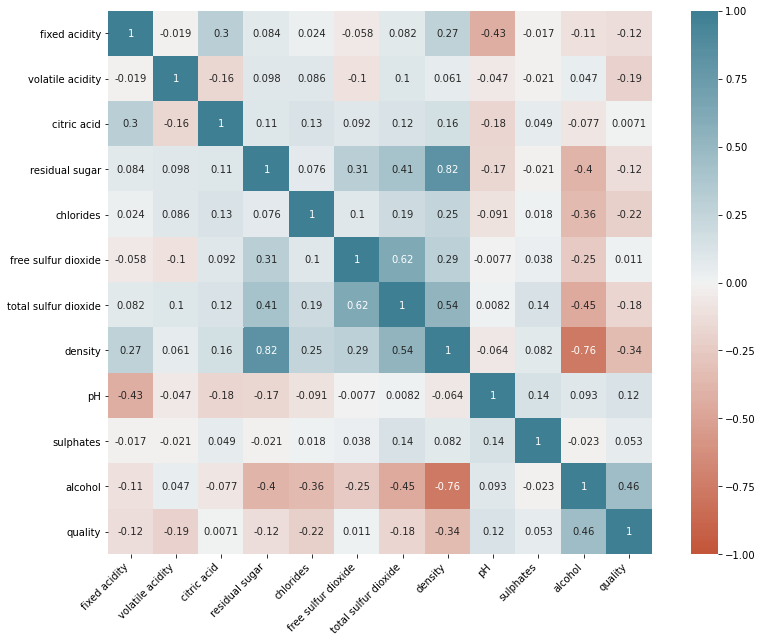

In [12]:
from seaborn import heatmap, diverging_palette

fig, ax = plt.subplots(figsize=(14, 10))

corr = wine.corr()
ax = heatmap(corr, vmin=-1, vmax=1, center=0, 
    cmap=diverging_palette(20, 220, n=200), square=True, annot=True)

ax.set_xticklabels( ax.get_xticklabels(),
    rotation=45, horizontalalignment='right');

9. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any.

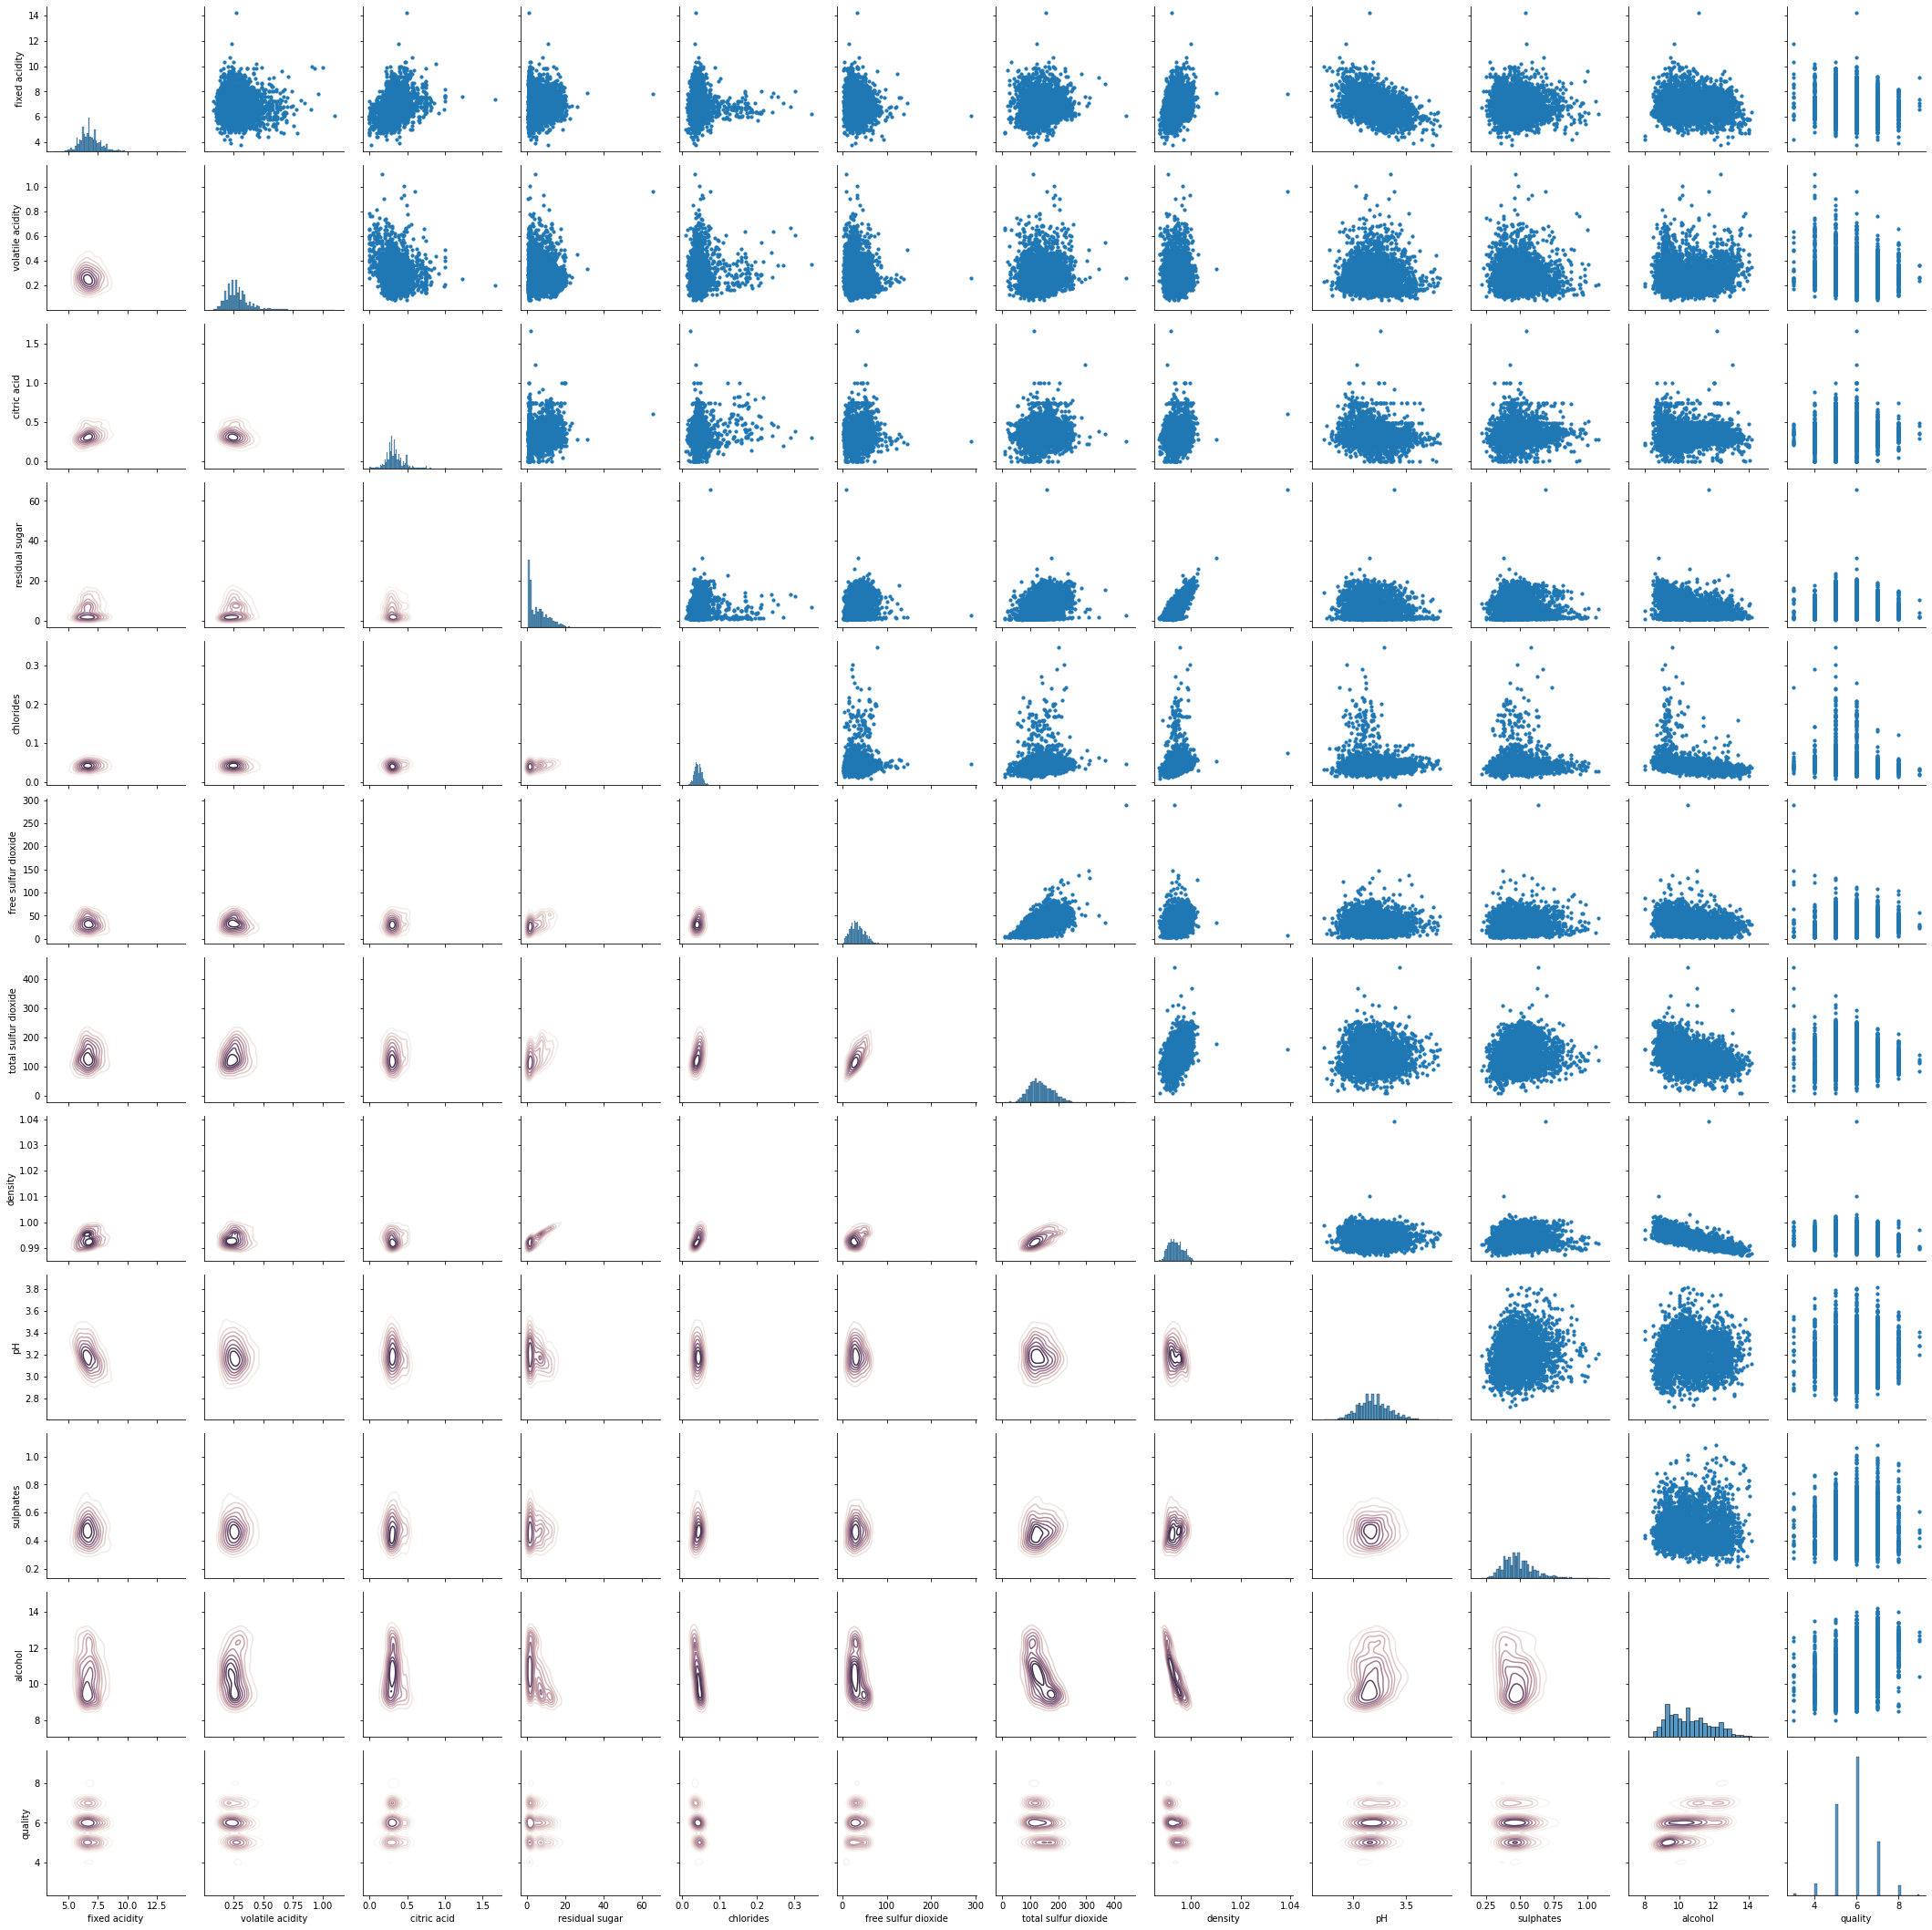

In [13]:
# Code to plot the pairplot from Workbook1 by Prof. Anita Raja

import warnings 
warnings.filterwarnings('ignore')

#Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
from IPython.display import Image

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

#Pair grid set up
g = sns.PairGrid(wine)

#Scatter plpot on the upper triangle
g.map_upper(plt.scatter, s=10)

# Distribution on the diagonal
g.map_diag(sns.histplot, kde=False)

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap=cmap)

g.savefig("pairplot.png")


##### Drop feautres

In [14]:
to_drop = ['free sulfur dioxide', 'citric acid']
wine = wine.drop((to_drop), axis=1)

In [15]:
"""
    Evualtes the model using a cross-validation.

    Parameters
    ----------
        folds: int
            Number of folds.
        data: numpy array 
            Array with rows representing data samples and columns representing 
            features.
        labels:  numpy array with labels corresponding to each row of 
            training features.
        model: object
            Object with the fit and predict methods
        model_args: dictionary 
            dictionary of arguments to pass to the 
            classification algorithm. 
        error_function : default = accuracy
            Computes the performance measure of the model. It
            can be f1, precision, recall, accuracy, mse or rmse.
            
    Returns
    ----------    
        A dictionary containing:
         - expected_labels
         - predicted_labels
         - average_error
    """

def sFold(folds, data, labels, model, error_function = 'accuracy', **model_args):
    
    indices = s_partition(folds, len(data))
    predicted_labels = []
    errors = []
    expected_labels = []
    
    start = 0
    for i in indices:
        # test set
        test_set = data[start:i]
        # train set (data not in test set)
        train_set = np.concatenate((data[:start], data[i:]))
        # labels of the test set
        test_labels = labels[start:i]
        # labels of the train set
        train_labels = np.concatenate((labels[:start], labels[i:]))
        start = i
            
        my_model = model()
        # fit the data to all the other partitions (1 - fold1)
        my_model.fit(train_set, train_labels , kwargs = model_args)
        # make a prediction on current partition
        prediction_fold = my_model.predict(test_set)
        # append the predictions of this round to predictions[]
        predicted_labels = np.append(predicted_labels, prediction_fold)
        
        # selects an error function
        if error_function == 'mse':
            error = np.mean((test_labels - prediction_fold)**2)
        elif error_function == 'rmse':
            error = np.sqrt(np.mean((test_labels - prediction_fold)**2))  
        
        # stores the error and expected labels of this round
        errors = np.append(errors, error)
        expected_labels = np.append(expected_labels, test_labels)
        
    return {'expected_labels':expected_labels, 
            'predicted_labels':predicted_labels,
            'average_error':np.mean(errors),
            'error': errors}



# Part C: Model Evaluation [30 pts]

10. Model selection via Hyperparameter tuning: Use the kFold function (known as sFold function from previous assignment) to evaluate the performance of your model over each combination of lambda, learning_rate and regularizer from the following sets: [15 pts]

    a. lambda = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
    
    b. learning_rate = [0.1, 0.01, 0.001, 0.001]
    
    c. regularizer = [l1, l2]
    
    d. Store the returned dictionary for each and present it in the report.
    
    e. Determine the best model (model selection) based on the overall performance (lowest average error). For the error_function argument of the kFold function (known as sFold function from previous assignment), use the “mse” function. For the model selection don’t augment the features. In other words, your model selection procedure should use the data matrix X as it is. 


#### Split the data into feature matrix and target 

In [16]:
def partition(X, y, test_ratio):
    # create an array with the indices of rows for the test set
    in_test = X.head(int(len(X)*test_ratio))
    X_train = X[~(X.index).isin(in_test.index)]
    y_train = y[~(y.index).isin(in_test.index)]
    return X_train , X.loc[in_test.index], y_train , y.loc[in_test.index]

# label vector
y = wine['quality']
# feature dataset
wine = wine.drop('quality', axis=1 )

# split the data into train and test set
X_train, X_test, y_train, y_test = partition(wine, y, 0.2) 

print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)


X_train size: (3169, 9)
X_test size: (792, 9)


#### Prepare data for Linear Regression

In [17]:
# Standardized the training dataset
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_std = (X_train - mean) / std

# reshape target arrays to a column vector 
y_train = np.array(y_train).reshape(-1,1)

# include the bias term in the matrix X
X_train_std = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]

####  Hyperparameter tuning

In [18]:
%%time
model_selection = {} 

#------Hyperparameter tunning for the Learning Rate------

learning_rate = [0.1, 0.01, 0.001, 0.0001]
    
for i, lr in enumerate(learning_rate):

    # regularizer default of model = None
    model_args = {'learning_rate': lr, 'tol':0.0001}
    lr_eval = sFold(4, X_train_std, y_train, model = Linear_Regression, 
                      error_function = 'mse', **model_args)
    model_selection['lr'+str(i)] = lr_eval

#------Hyperparameter tunning for Regularization------

lmbda = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
regularizer = ['l1', 'l2']

for j, lm in enumerate(lmbda):    
    # lmbda = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]

    #learning_rate: 0.1
    # regularizer  = l1 
    model_args = {'learning_rate': 0.01, 'regularizer':'l1', 'lmbda':lm, 'tol':0.0001}
    l1_eval = sFold(4, X_train_std, y_train, model = Linear_Regression, 
                          error_function = 'mse', **model_args)
    model_selection['l1lmd'+str(j)] = l1_eval

    #learning_rate: 0.1
    # regularizer  = l2
    model_args = {'learning_rate': 0.01, 'regularizer':'l2', 'lmbda':lm, 'tol':0.0001}
    l2_eval = sFold(4, X_train_std, y_train, model = Linear_Regression, 
                          error_function = 'mse', **model_args)
    model_selection['l2lmd'+str(j)] = l2_eval    
    
  

Wall time: 1.95 s


In [19]:
for key in model_selection:
    print( 'Average of', key, ':', model_selection[key]['average_error'])

Average of lr0 : 0.5589898307621344
Average of lr1 : 0.5639007273106831
Average of lr2 : 5.266889001909777
Average of lr3 : 28.780185652878547
Average of l1lmd0 : 0.5639616208633186
Average of l2lmd0 : 0.5639116799682148
Average of l1lmd1 : 0.5639007273106831
Average of l2lmd1 : 0.5639007273106831
Average of l1lmd2 : 0.5639066815079199
Average of l2lmd2 : 0.563901819903606
Average of l1lmd3 : 0.5639013211096859
Average of l2lmd3 : 0.5639008365432198
Average of l1lmd4 : 0.5639007866782939
Average of l2lmd4 : 0.5639007382336688
Average of l1lmd5 : 0.5639007332473212
Average of l2lmd5 : 0.5639007284029788


In [20]:
ls_scores =[]

for i, key in enumerate(model_selection):
    ls_scores.append(model_selection[key]['average_error'])
    if i == 4: break
        
df = pd.DataFrame(list(zip(learning_rate, ls_scores)), 
               columns =['Learning Rate', 'Avg MSE'])         
df.head()

,Learning Rate,Avg MSE
0,0.1000,0.558990
1,0.0100,0.563901
2,0.0010,5.266889
3,0.0001,28.780186


11. Evaluate your model on the test data and report the mean squared error. [5 pts]

The best parameters for the linear model are the ones obtained with:

    - learning rate = 0.1
    - No Regularization
    - tol = 0.0001 to speed up the process
    
**NOTE**: with tol= 0.001 the model stopped after finding the lowest cost in less than 50% of iterations of the ephoc value. Ex:
    
    - For Learning Rate= 0.1 it took about 61 iterations
    - For Learning Rate= 0.01 it took about 451 iterations
    
    But for Learning Rates 0.001 and 0.0001 the fitting process did not stop early, meaning the learning rate was too small and the model didn't reach its global minimum. 
    
    In the regularization cases the model took about 453 iterations to reach the lowest cost.
    
    Using tol = 0.001 the model reached low cost values in even less iterations but with a lower tol = 0.0001 the model reached lower cost values.
    
#### Prepare test data set for Linear Regression

In [21]:
# Standardized the test dataset
mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)
X_test_std = (X_test - mean) / std

# reshape target array to a column vector 
y_test = np.array(y_test).reshape(-1,1)

# include the bias term in the matrix X
X_test_std = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

In [22]:
# train the model and predict target values
linear_reg = Linear_Regression()
linear_reg.fit(X = X_train_std, Y = y_train, learning_rate=0.1, epochs=1000, tol = 0.0001)
pred = linear_reg.predict(X_test_std)

mse_score = mse(y_test, pred)
rmse = np.sqrt(np.mean((y_test - pred)**2))

print('Test set scores')
print('----------------------')
print('MSE:', mse_score)
print('RMSE:', rmse)

Test set scores
----------------------
MSE: 0.6071231239302527
RMSE: 0.7791810597866536


12. Using the best model plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve. [5 pts]

Max train size: 2376
Number of cross-val: 237


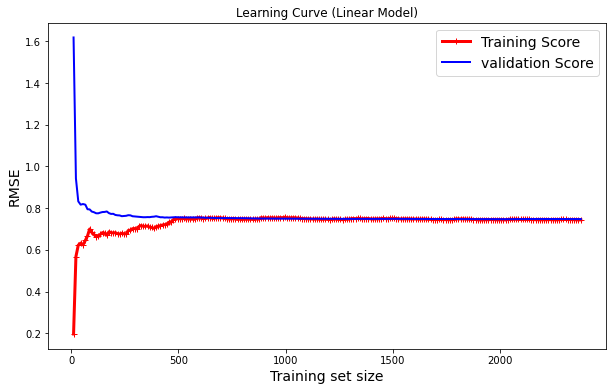

,Train size,Train Scores,Val scores
0,11,0.196718,1.617974
1,22,0.567877,0.942285
2,33,0.622597,0.832361
3,44,0.632228,0.816587
4,55,0.623931,0.819558
...,...,...,...
232,2336,0.744909,0.747551
233,2346,0.744381,0.747627
234,2356,0.743581,0.747636
235,2366,0.743291,0.747589


In [23]:
train_scores, val_scores, train_sizes = learning_curve(Linear_Regression, 
                X_train_std, y_train,cv=4, train_size=10 ,error_function='rmse', 
                learning_rate=0.1, epochs=1000, tol=0.0001, regularizer=None)

plot_learning_curve(train_scores, val_scores, train_sizes, degree=1)

# create a table with train and validation scores for each train size
df = pd.DataFrame(list(zip(train_sizes, np.mean(train_scores, axis=1), 
                           np.mean(val_scores, axis=1))), 
               columns =['Train size', 'Train Scores','Val scores'])         

df

13. Determine the best model hyperparameter values for the training data matrix with polynomial degree 3 and plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve. [5

In [24]:
# Augment features for degree = 3
X_train_poly3 = polynomialFeatures(X_train.to_numpy(), degree=3)
print('X train features:', X_train.shape[1])
print('X train augmented features:', X_train_poly3.shape[1])

# Standardized the training dataset
mean = np.mean(X_train_poly3, axis=0)
std = np.std(X_train_poly3, axis=0)
X_train_poly3_std = (X_train_poly3 - mean) / std

# include the bias term in the matrix X
X_train_poly3_std = np.c_[np.ones((X_train_poly3_std.shape[0], 1)), X_train_poly3_std]

X train features: 9
X train augmented features: 219


In [25]:
%%time
model_selection = {} 

#------Hyperparameter tunning Learning Rate------   

learning_rate = [0.1, 0.01, 0.001, 0.0001]
    
for i, lr in enumerate(learning_rate):

    # regularizer: None
    model_args = {'learning_rate': lr, 'tol':0.00001}
    lr_eval = sFold(4, X_train_poly3_std, y_train, model = Linear_Regression, 
                      error_function = 'mse', **model_args)
    model_selection['lr'+str(i)] = lr_eval
    

#------Hyperparameter tunning for Regularization------

lmbda = [1.0, 0, 0.1, 0.01, 0.001, 0.00001]
regularizer = ['l1', 'l2']

for j, lm in enumerate(lmbda):    
    
    #learning_rate: 0.01
    # regularizer  = l1 
    model_args = {'learning_rate': 0.01, 'regularizer':'l1', 'lmbda':lm, 'tol':0.00001}
    l1_eval = sFold(4, X_train_poly3_std, y_train, model = Linear_Regression,
                          error_function = 'mse', **model_args)
    model_selection['l1lmd'+str(j)] = l1_eval

    #learning_rate: 0.01
    # regularizer  = l2
    model_args = {'learning_rate': 0.01, 'regularizer':'l2', 'lmbda':lm, 'tol':0.00001}
    l2_eval = sFold(4, X_train_poly3_std, y_train, model = Linear_Regression,
                          error_function = 'mse', **model_args)
    model_selection['l2lmd'+str(j)] = l2_eval

Wall time: 10.6 s


In [26]:
for key in model_selection:
    print( 'Average of', key, ':', model_selection[key]['average_error'])
     
ls_scores =[]
for i, key in enumerate(model_selection):
    ls_scores.append(model_selection[key]['average_error'])
    if i == 4: break
        
df = pd.DataFrame(list(zip(learning_rate, ls_scores)), 
               columns =['Learning Rate', 'Avg MSE'])         
df.head()

Average of lr0 : 4004209653.0219364
Average of lr1 : 0.5736406365025962
Average of lr2 : 5.379025152134275
Average of lr3 : 28.838743834060367
Average of l1lmd0 : 0.5691870946810964
Average of l2lmd0 : 0.5734452700708697
Average of l1lmd1 : 0.5736406365025962
Average of l2lmd1 : 0.5736406365025962
Average of l1lmd2 : 0.5731556372719808
Average of l2lmd2 : 0.5736210416500622
Average of l1lmd3 : 0.5735916775349351
Average of l2lmd3 : 0.5736386764339791
Average of l1lmd4 : 0.5736357363009336
Average of l2lmd4 : 0.5736404404898996
Average of l1lmd5 : 0.573640587497465
Average of l2lmd5 : 0.5736406345424626


,Learning Rate,Avg MSE
0,0.1000,4.004210e+09
1,0.0100,5.736406e-01
2,0.0010,5.379025e+00
3,0.0001,2.883874e+01


#### Best Parameters for Polynomial 3rd degree:
     - Learning Rate: 0.01
     - Regularization: L1
     - Lambda: 1
     
#### Evaluate the model on the test set using MSE and RMSE

In [27]:
# Augment the features for the test set
X_test_poly3 = polynomialFeatures(X_test.to_numpy(), degree=3)

# Standardized the augmented test dataset
mean = np.mean(X_test_poly3, axis=0)
std = np.std(X_test_poly3, axis=0)
X_test_poly3_std = (X_test_poly3 - mean) / std

# include the bias term in the feature matrix
X_test_poly3_std = np.c_[np.ones((X_test_poly3_std.shape[0], 1)), X_test_poly3_std]

# train the model and predict target values
poly_reg= Linear_Regression()
poly_reg.fit(X = X_train_poly3_std, Y = y_train, learning_rate=0.01, epochs=1000, 
                    regularizer='l1', lmbda=1, tol=0.00001)
pred_poly = poly_reg.predict(X_test_poly3_std)

mse_score = mse(y_test, pred_poly)
rmse = np.sqrt(np.mean((y_test - pred_poly)**2))

print('Test set scores')
print('----------------------')
print('MSE:', mse_score)
print('RMSE:', rmse)

Test set scores
----------------------
MSE: 0.5810807470709172
RMSE: 0.7622865255734993


#### Learning curve polynomial 3rd grade Regularizer L1 lmda = 1

Max train size: 2376
Number of cross-val: 118


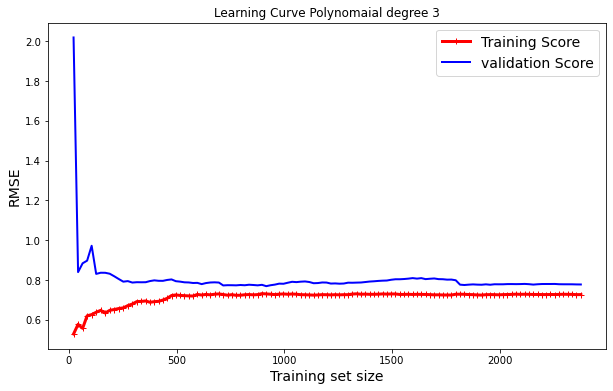

,Train size,Train Scores,Val scores
0,21,0.529013,2.019036
1,42,0.577450,0.839946
2,63,0.557510,0.884102
3,84,0.620340,0.897546
4,105,0.626422,0.972279
...,...,...,...
113,2296,0.728588,0.778747
114,2316,0.728144,0.778696
115,2336,0.727957,0.778641
116,2356,0.726724,0.778044


In [28]:
# X_train_poly3_std is the prepared feature matrix for 3rd degree polynomial
# it has been already augmented, standardized and inlcudes the bias term 

train_scores_3, val_scores_3, train_sizes_3 = learning_curve(Linear_Regression, 
            X_train_poly3_std, y_train, cv=4, train_size=20 ,error_function='rmse', 
            learning_rate=0.01, epochs=1000, tol=0.0001, regularizer='l1', lmbda=1)


plot_learning_curve(train_scores_3, val_scores_3, train_sizes_3, degree=3)

# create a table with train and validation scores for each train size
df = pd.DataFrame(list(zip(train_sizes_3, np.mean(train_scores_3, axis=1), 
                           np.mean(val_scores_3, axis=1))), 
               columns =['Train size', 'Train Scores','Val scores'])         

df